In [22]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
! cp /content/kaggle.json ~/.kaggle/

In [27]:
! chmod 600 ~/.kaggle/kaggle.json

In [28]:
! kaggle datasets download -d sulianova/cardiovascular-disease-dataset

cardiovascular-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
from zipfile import ZipFile
file_name = "/content/cardiovascular-disease-dataset.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


>## importing Dataset

In [69]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/cardio_train.csv",sep=";")

In [71]:
dataset.drop("id",axis=1,inplace=True)

In [72]:
dataset.drop_duplicates(inplace=True)

In [73]:
#dataset["bmi"]=dataset["weight"]/(dataset["height"]/100)**2

In [74]:
out_filter=((dataset["ap_hi"]>250|(dataset["ap_lo"]>200)))

In [75]:
dataset=dataset[~out_filter]

In [76]:
print(len(dataset))

9


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4607 to 46627
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9 non-null      int64  
 1   gender       9 non-null      int64  
 2   height       9 non-null      int64  
 3   weight       9 non-null      float64
 4   ap_hi        9 non-null      int64  
 5   ap_lo        9 non-null      int64  
 6   cholesterol  9 non-null      int64  
 7   gluc         9 non-null      int64  
 8   smoke        9 non-null      int64  
 9   alco         9 non-null      int64  
 10  active       9 non-null      int64  
 11  cardio       9 non-null      int64  
dtypes: float64(1), int64(11)
memory usage: 936.0 bytes


In [78]:

dataset.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

># Splitting Dataset 

In [79]:
x=dataset.iloc[:,:-1]
y=dataset.loc[:,["cardio"]]

>## Create model

In [80]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
classifier =RandomForestClassifier(n_estimators=6,criterion="entropy",random_state=0)

In [83]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [84]:
y_pred=classifier.predict(x_test)

>## Evalution

In [86]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [88]:
print("Accuracy:",classifier.score(x_test,y_test))

Accuracy: 1.0


In [91]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import scikitplot as skplt
import matplotlib.pyplot as plt


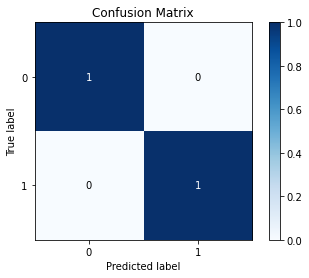

In [95]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=False)
plt.show()

>## Upload data

In [102]:
print("New Prediction:",classifier.predict(np.array([[6,142,72,45,0,38.6,0.627,50,80,9,8
                                                      ]])))

New Prediction: [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
